In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_names = ['RM','LSTAT','PTRATIO','MEDV']
data = pd.read_csv('C:\\Users\\14503\\OneDrive\\2020-machinelearning\\machine-learning-master\\projects\\boston_housing\\housing.csv')
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [2]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [4]:
from sklearn.model_selection import train_test_split

X = data[column_names[0:-1]]
y = data[column_names[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [5]:
#Standardization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [6]:
X_train
X_train.shape

(391, 3)

In [7]:
X_test.shape

(98, 3)

In [8]:
#method1: LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)
LinearRegression_score = r2_score(y_test, lr_y_predict)

#print (y_predict)
#print (y_test)

print ('LinearRegression结果为：')
print ('%s: %f' %('MAE',mean_absolute_error(y_test, lr_y_predict)))
print ('%s: %f' %('MSE',mean_squared_error(y_test, lr_y_predict)))
print ('%s: %f' %('r2 score',LinearRegression_score))

LinearRegression结果为：
MAE: 64456.496246
MSE: 6922885233.555172
r2 score: 0.706385


In [9]:
#method2: SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

svr = SVR(kernel='sigmoid',max_iter=3000)
#No matter how I set up the kernel function，such as 'sigmoid','linear','poly','RBF',etc. and the number of iterations, the r2 score is always
#the negative number.I've looked up the information and it indicates that setting the parameters to adjust the model yields a fit that is also 
#more erroneous than a random guess at a mean.
svr.fit(X_train, y_train)
svr_y_predict = svr.predict(X_test)
SVR_score = r2_score(y_test, svr_y_predict)

print ('SVR结果为：')
print ('%s: %f' %('MAE',mean_absolute_error(y_test, svr_y_predict)))
print ('%s: %f' %('MSE',mean_squared_error(y_test, svr_y_predict)))
print ('%s: %f' %('r2 score',SVR_score))

SVR结果为：
MAE: 123101.190631
MSE: 23744697050.013432
r2 score: -0.007067


In [10]:
#method3: KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr_y_predict = knr.predict(X_test)
KNeighborsRegressor_score = r2_score(y_test, knr_y_predict)

print ('KNeighborsRegressor结果为：')
print ('%s: %f' %('MAE',mean_absolute_error(y_test, knr_y_predict)))
print ('%s: %f' %('MSE',mean_squared_error(y_test, knr_y_predict)))
print ('%s: %f' %('r2 score',KNeighborsRegressor_score))

KNeighborsRegressor结果为：
MAE: 50442.857143
MSE: 4451202000.000000
r2 score: 0.811214


In [11]:
#method4: DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_y_predict = dtr.predict(X_test)
DecisionTreeRegressor_score = r2_score(y_test, dtr_y_predict)

print ('DecisionTreeRegressor结果为：')
print ('%s: %f' %('MAE',mean_absolute_error(y_test, dtr_y_predict)))
print ('%s: %f' %('MSE',mean_squared_error(y_test, dtr_y_predict)))
print ('%s: %f' %('r2 score',DecisionTreeRegressor_score))

DecisionTreeRegressor结果为：
MAE: 63300.000000
MSE: 6807150000.000000
r2 score: 0.711293


In [12]:
#method5: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_y_predict = rfr.predict(X_test)
RandomForestRegressor_score = r2_score(y_test, rfr_y_predict)

print ('RandomForestRegressor结果为：')
print ('%s: %f' %('MAE',mean_absolute_error(y_test, rfr_y_predict)))
print ('%s: %f' %('MSE',mean_squared_error(y_test, rfr_y_predict)))
print ('%s: %f' %('r2 score',RandomForestRegressor_score))

RandomForestRegressor结果为：
MAE: 49105.714286
MSE: 4195260900.000000
r2 score: 0.822069


D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
#method6: GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_y_predict = gbr.predict(X_test)
GradientBoostingRegressor_score = r2_score(y_test, gbr_y_predict)

print ('GradientBoostingRegressor结果为：')
print ('%s: %f' %('MAE',mean_absolute_error(y_test, gbr_y_predict)))
print ('%s: %f' %('MSE',mean_squared_error(y_test, gbr_y_predict)))
print ('%s: %f' %('r2 score',GradientBoostingRegressor_score))

GradientBoostingRegressor结果为：
MAE: 49346.335759
MSE: 4150667970.626709
r2 score: 0.823961


In [14]:
#method7: MLPRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mlpr = MLPRegressor(hidden_layer_sizes=(200,10), max_iter=9000)
#If max_iter is too little,there is a convergence warning that means the not best fitting,and 9000 is the edge.
mlpr.fit(X_train, y_train)
mlpr_y_predict = mlpr.predict(X_test)
MLPRegressor_score = r2_score(y_test, mlpr_y_predict)

print ('MLPRegressor结果为：')
print ('%s: %f' %('MAE',mean_absolute_error(y_test, mlpr_y_predict)))
print ('%s: %f' %('MSE',mean_squared_error(y_test, mlpr_y_predict)))
print ('%s: %f' %('r2 score',MLPRegressor_score))

MLPRegressor结果为：
MAE: 52869.229105
MSE: 5085008068.020052
r2 score: 0.784333


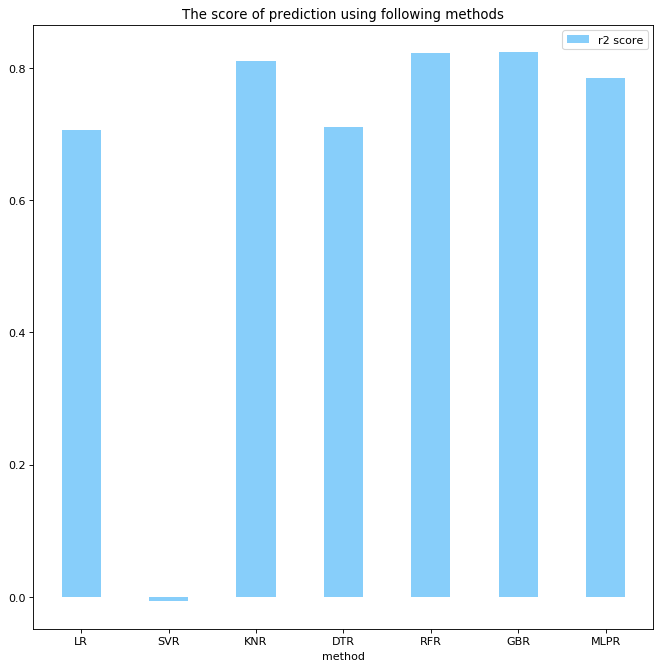

In [15]:
#The bar graph
plt.figure(figsize=(10, 10), dpi=80)
Number = 7
values = (LinearRegression_score,SVR_score,KNeighborsRegressor_score,DecisionTreeRegressor_score,RandomForestRegressor_score,
          GradientBoostingRegressor_score,MLPRegressor_score)
index = np.arange(Number)
width = 0.45
p2 = plt.bar(index, values, width, label="r2 score", color="#87CEFA")
plt.xlabel('method')
plt.title('The score of prediction using following methods')
plt.xticks(index, ('LR', 'SVR', 'KNR', 'DTR', 'RFR', 'GBR', 'MLPR'))
plt.legend(loc="upper right")
plt.show()

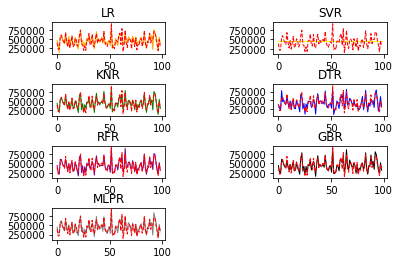

In [34]:
#The predicted and actual value
plt.figure()
x = np.linspace(0,98,98)
y0 = y_test
y1 = lr_y_predict
y2 = svr_y_predict
y3 = knr_y_predict
y4 = dtr_y_predict
y5 = rfr_y_predict
y6 = gbr_y_predict
y7 = mlpr_y_predict


plt.subplot(4,2,1)
plt.title('LR')
plt.plot(x,y1,color='orange',linewidth=1)
plt.plot(x,y0,color='red',linewidth=1,linestyle='--')

plt.subplot(4,2,2)
plt.title('SVR')
plt.plot(x,y2,color='yellow',linewidth=1)
plt.plot(x,y0,color='red',linewidth=1,linestyle='--')

plt.subplot(4,2,3)
plt.title('KNR')
plt.plot(x,y3,color='green',linewidth=1)
plt.plot(x,y0,color='red',linewidth=1,linestyle='--')

plt.subplot(4,2,4)
plt.title('DTR')
plt.plot(x,y4,color='blue',linewidth=1)
plt.plot(x,y0,color='red',linewidth=1,linestyle='--')

plt.subplot(4,2,5)
plt.title('RFR')
plt.plot(x,y5,color='purple',linewidth=1)
plt.plot(x,y0,color='red',linewidth=1,linestyle='--')

plt.subplot(4,2,6)
plt.title('GBR')
plt.plot(x,y6,color='black',linewidth=1)
plt.plot(x,y0,color='red',linewidth=1,linestyle='--')

plt.subplot(4,2,7)
plt.title('MLPR')
plt.plot(x,y7,color='grey',linewidth=1)
plt.plot(x,y0,color='red',linewidth=1,linestyle='--')


plt.subplots_adjust(wspace =0.95, hspace =0.95)

plt.show()